In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import re

import config_error_by_period_syntheic as config

In [2]:
def load_csv_data(path: str) -> pd.core.frame.DataFrame:
    """Load CSV dataset as dataframe"""
    return pd.read_csv(path, delimiter=',')

In [3]:
def plot_error_by_period(df: pd.core.frame.DataFrame) -> None:
    """Plot error by period"""
    df_average = df[-1:]
    dim = config.epoch // config.period
    data_to_visualize = df_average.iloc[:, :dim]

    x_labels = list(range(0, config.epoch, config.period))

    plt.figure(figsize=(10, 6))
    # plt.plot(x_labels, data_to_visualize.values[0], marker='o', linestyle='-')
    plt.plot(x_labels, data_to_visualize.values[0], linestyle='-')

    plt.xlabel('Time step t')
    plt.ylabel('Prediction error')
    plt.grid(True)
    plt.show()

In [4]:
def plot_error_by_period_multiple_with_labels(df_list: list, labels: list) -> None:
    """Plot error by period for multiple dataframes"""
    plt.figure(figsize=(10, 6))

    dim = config.epoch // config.period
    x_labels = list(range(0, config.epoch, config.period))

    for i, (df, label) in enumerate(zip(df_list, labels)):
        df_average = df[-1:]
        data_to_visualize = df_average.iloc[:, :dim]

        # Use regular expression to match label and extract case number
        match = re.search(r'Case (\d+)', label)
        if match:
            case_number = int(match.group(1)) - 1  # Subtract 1 to match with color_dict index
        else:
            case_number = i  # Default to index if label doesn't match

        color = config.color_dict.get(case_number, 'k')  # Default to black if case number not found
        plt.plot(x_labels, data_to_visualize.values[0], linestyle='-', color=color, label=label)

    plt.xlabel('Time step t')
    plt.ylabel('Prediction error')
    plt.grid(True)
    plt.legend()
    plt.show()

## Case 1

In [5]:
case1_df = load_csv_data(config.case1_error_by_period_path)
case1_df

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,59201~59300,59301~59400,59401~59500,59501~59600,59601~59700,59701~59800,59801~59900,59901~60000,Unnamed: 600,Unnamed: 601
0,2.00127,2.19418,2.12453,2.15960,2.36207,2.19517,1.46958,1.008340,0.720578,0.672653,...,0.496689,0.459948,0.496689,0.459948,0.496689,0.459245,0.466044,0.483233,NaN,332.442
1,2.00000,2.15932,2.19442,2.15702,2.24484,1.97593,1.56609,0.838379,0.662799,0.609639,...,0.469901,0.473683,0.480443,0.457058,0.529985,0.459728,0.447236,0.459728,NaN,330.521
2,2.00000,2.14961,2.18925,2.22638,2.34661,2.06499,1.73513,1.069960,0.673129,0.676197,...,0.461875,0.490404,0.467371,0.494027,0.461875,0.473847,0.524391,0.482324,NaN,329.681
3,2.00000,2.19518,2.28306,2.20076,2.30145,2.16838,1.55458,0.823829,0.668482,0.686035,...,0.500591,0.448138,0.462611,0.463457,0.483717,0.462611,0.463457,0.461778,NaN,330.282
4,2.00000,2.16465,2.22541,2.20506,2.31810,2.17602,1.59929,0.872604,0.664186,0.630576,...,0.473160,0.457431,0.476564,0.476564,0.476564,0.476564,0.476564,0.476564,NaN,335.033
5,2.00000,2.19937,2.15639,2.11542,2.17008,2.22091,1.56581,0.881879,0.686311,0.709867,...,0.467243,0.467243,0.467243,0.467243,0.467243,0.467243,0.467243,0.467243,NaN,332.685
6,2.00000,2.16118,2.17519,2.20555,2.36781,2.03994,1.32221,0.912443,0.708630,0.703839,...,0.453209,0.450122,0.468981,0.453209,0.450122,0.468981,0.453209,0.450122,NaN,331.331
7,2.01996,2.17071,2.17654,2.26922,2.22940,2.20645,1.65189,0.838572,0.683577,0.662503,...,0.488001,0.488001,0.488001,0.488001,0.488001,0.488001,0.488001,0.488001,NaN,337.102
8,2.00000,2.19431,2.22630,2.23219,2.28379,2.13528,1.55908,1.144270,0.732651,0.689868,...,0.530677,0.530677,0.530677,0.530677,0.530677,0.530677,0.530677,0.530677,NaN,336.872
9,2.00000,2.17053,2.20560,2.22766,2.28670,1.99293,1.52989,0.836133,0.652776,0.607452,...,0.469661,0.477839,0.477839,0.477839,0.477839,0.484768,0.479237,0.460888,NaN,327.286


In [6]:
# Get last row using values[] 
case1_df_average = case1_df[-1:]
dim = config.epoch // config.period
case1_df_average.iloc[:, :dim]

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,59001~59100,59101~59200,59201~59300,59301~59400,59401~59500,59501~59600,59601~59700,59701~59800,59801~59900,59901~60000
10,2.00212,2.1759,2.19567,2.19989,2.29109,2.1176,1.55535,0.922641,0.685312,0.664863,...,0.478484,0.476141,0.481101,0.474349,0.481642,0.476802,0.486271,0.477167,0.479606,0.476056


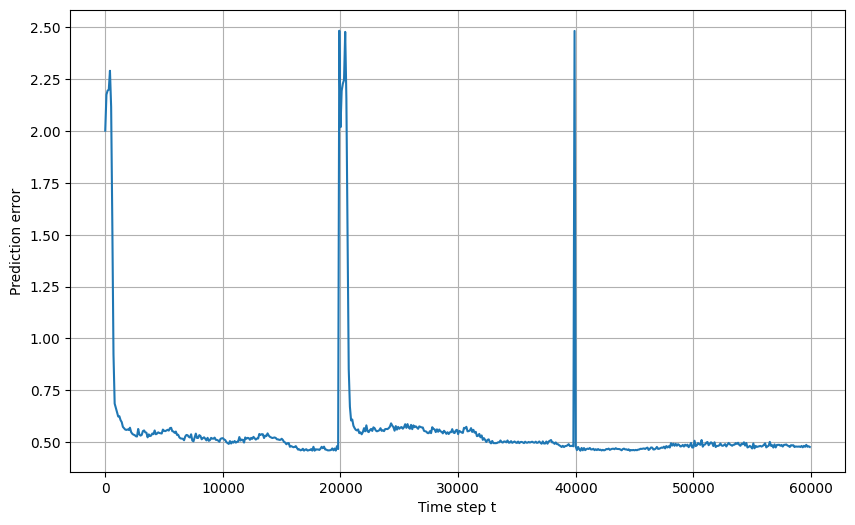

In [7]:
plot_error_by_period(df=case1_df)

# Case 2

In [8]:
case2_df = load_csv_data(config.case2_error_by_period_path)
case2_df

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,59201~59300,59301~59400,59401~59500,59501~59600,59601~59700,59701~59800,59801~59900,59901~60000,Unnamed: 600,Unnamed: 601
0,2.44102,4.42580,3.98581,4.08689,4.53797,4.49868,4.93053,4.96131,4.66089,4.61349,...,1.66288,2.07891,2.04663,1.67715,2.08423,2.04730,1.79883,2.04552,NaN,1625.87
1,2.54092,4.08478,3.88514,3.70740,4.57883,4.63893,4.91586,4.83701,5.00295,4.25659,...,2.34052,2.36911,2.35383,2.27865,2.44013,2.34751,2.37437,2.28498,NaN,1584.52
2,2.19435,4.49555,3.64727,3.58142,3.68544,4.19065,4.63260,4.78494,4.90706,4.49658,...,1.98280,3.11476,3.06687,1.58144,1.99716,3.28004,2.31083,2.00341,NaN,1601.19
3,2.29106,4.35802,4.39934,4.45099,4.46559,4.51976,4.00246,4.67703,4.12938,3.40075,...,2.28366,2.26630,2.29577,2.30235,2.27320,2.31452,2.23585,2.28047,NaN,1537.80
4,2.42210,5.06689,4.80870,4.65454,4.74583,4.26332,3.81481,3.75997,3.98786,3.96636,...,2.02603,2.03869,1.42203,1.66611,2.10502,2.20318,1.53355,1.94703,NaN,1543.04
5,2.51275,3.63788,3.82158,4.19967,4.53717,4.67270,4.96723,4.45381,4.54359,4.63141,...,2.53694,2.44293,1.86101,2.21702,1.98024,2.68609,2.40055,2.05742,NaN,1548.66
6,2.26264,4.53536,4.45512,4.41298,4.09645,4.57964,4.49783,4.35087,4.39496,4.04337,...,1.96632,1.64931,1.58707,2.23049,2.15837,1.70005,1.61507,1.91098,NaN,1519.25
7,2.27141,3.38554,4.48751,3.72462,4.12113,4.37566,4.33879,3.90293,4.68210,4.36328,...,2.89078,2.29612,1.80832,2.58086,2.55065,1.96437,2.79719,1.81375,NaN,1555.40
8,2.28126,4.49311,3.36608,3.51670,4.17789,4.31575,4.54348,4.78113,4.14710,4.25106,...,2.45828,2.53452,2.49914,2.41299,2.52950,2.46237,2.49864,2.33871,NaN,1625.85
9,2.49868,4.23610,4.71205,5.00579,4.88544,4.74067,4.85459,4.73537,4.81498,4.32787,...,2.23251,2.24535,2.34198,2.61687,1.65674,2.04863,1.65021,1.81276,NaN,1539.68


In [9]:
# Get last row using values[] 
case2_df_average = case2_df[-1:]
dim = config.epoch // config.period
case2_df_average.iloc[:, :dim]

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,59001~59100,59101~59200,59201~59300,59301~59400,59401~59500,59501~59600,59601~59700,59701~59800,59801~59900,59901~60000
10,2.37162,4.2719,4.15686,4.1341,4.38318,4.47958,4.54982,4.52444,4.52709,4.23507,...,2.00215,2.26417,2.23807,2.3036,2.12826,2.15639,2.17752,2.30541,2.12151,2.0495


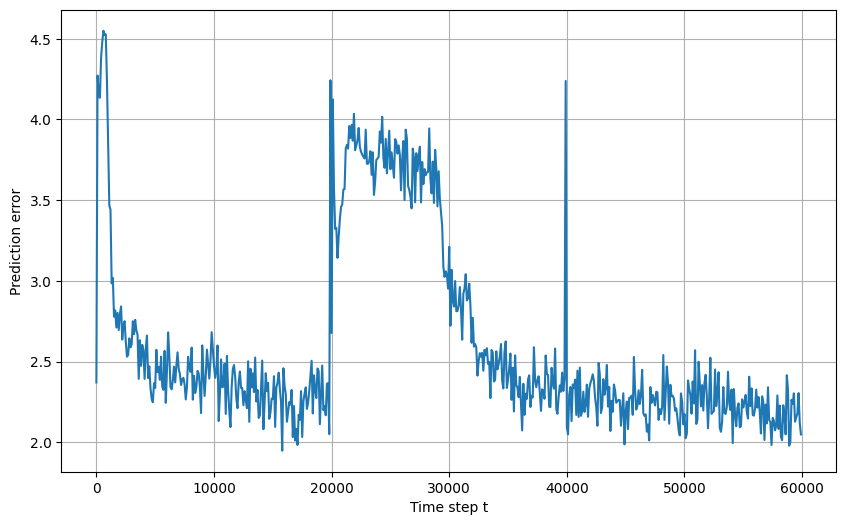

In [10]:
plot_error_by_period(df=case2_df)

# Case 3

In [11]:
case3_df = load_csv_data(config.case3_error_by_period_path)
case3_df

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,59201~59300,59301~59400,59401~59500,59501~59600,59601~59700,59701~59800,59801~59900,59901~60000,Unnamed: 600,Unnamed: 601
0,2,2.01734,2.01458,2.03165,2.31437,2.16531,1.54491,0.730047,0.505128,0.351486,...,0.110159,0.119543,0.108781,0.106885,0.110159,0.119543,0.110137,0.106885,NaN,30136.6
1,2,2.01069,2.01627,2.03165,2.31632,2.16967,1.55051,0.735653,0.510739,0.353458,...,0.116831,0.115293,0.110137,0.118187,0.115293,0.110137,0.118187,0.120899,NaN,30136.9
2,2,2.01069,2.02170,2.03430,2.31900,2.17177,1.55003,0.735653,0.510739,0.353458,...,0.108781,0.108781,0.108781,0.108781,0.108781,0.108781,0.108781,0.108781,NaN,30136.6
3,2,2.02086,2.02169,2.03427,2.31661,2.17116,1.54941,0.735221,0.508702,0.353458,...,0.118923,0.119543,0.117237,0.110159,0.113381,0.110159,0.113381,0.110159,NaN,30136.8
4,2,2.00585,2.02278,2.12176,2.22345,2.02791,1.39904,0.547698,0.437540,0.335044,...,0.119543,0.113003,0.119543,0.115279,0.119543,0.113003,0.119543,0.115279,NaN,30138.5
5,2,2.01406,2.01700,2.03646,2.31661,2.16628,1.54589,0.735653,0.510739,0.353458,...,0.110987,0.120899,0.110159,0.120899,0.110159,0.120899,0.110159,0.110159,NaN,30137.1
6,2,2.00748,2.00718,2.12103,2.22935,2.02810,1.39925,0.547906,0.440250,0.336401,...,0.118165,0.117567,0.118165,0.117567,0.118165,0.117567,0.118165,0.117567,NaN,30136.9
7,2,2.01406,2.02068,2.03217,2.36143,1.94763,1.60931,0.676787,0.510643,0.392599,...,0.118187,0.111515,0.119437,0.111515,0.111515,0.110159,0.111515,0.110159,NaN,30136.8
8,2,2.00748,2.01225,2.12900,2.23327,2.03810,1.39925,0.547906,0.437223,0.333373,...,0.118187,0.118187,0.118187,0.118187,0.118187,0.118187,0.118187,0.118187,NaN,30136.6
9,2,2.02339,2.02460,2.03481,2.36272,1.94763,1.60591,0.675805,0.511479,0.392293,...,0.112071,0.119543,0.112071,0.119543,0.110159,0.116831,0.112071,0.119543,NaN,30136.6


In [12]:
# Get last row using values[] 
case3_df_average = case3_df[-1:]
dim = config.epoch // config.period
case3_df_average.iloc[:, :dim]

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,59001~59100,59101~59200,59201~59300,59301~59400,59401~59500,59501~59600,59601~59700,59701~59800,59801~59900,59901~60000
10,2,2.01319,2.01787,2.06071,2.29931,2.08336,1.51535,0.666833,0.488318,0.355503,...,0.11421,0.114104,0.115184,0.116388,0.11425,0.1147,0.113534,0.114527,0.114013,0.113762


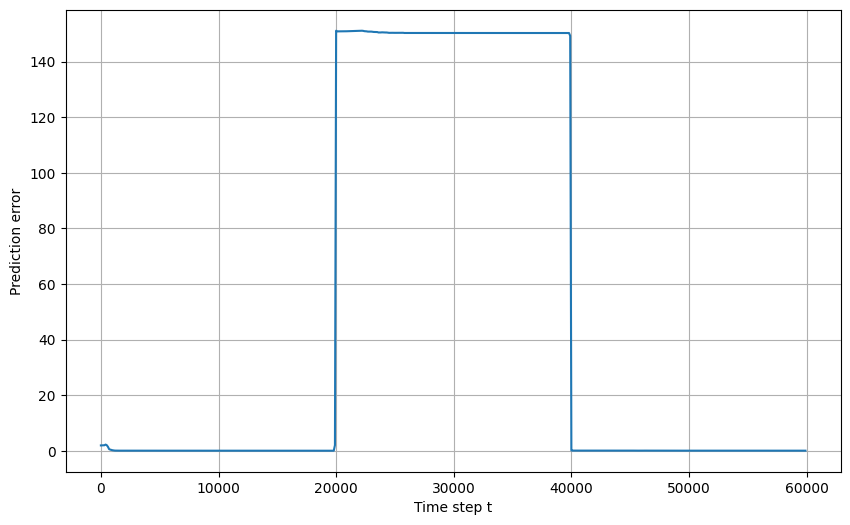

In [13]:
plot_error_by_period(df=case3_df)

# Case 4

In [14]:
case4_df = load_csv_data(config.case4_error_by_period_path)
case4_df

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,59201~59300,59301~59400,59401~59500,59501~59600,59601~59700,59701~59800,59801~59900,59901~60000,Unnamed: 600,Unnamed: 601
0,2,2.01734,2.01458,2.03165,2.31437,2.16531,1.54491,0.730047,0.505128,0.351486,...,0.076550,0.120568,0.076550,0.095497,0.095497,0.095497,0.095497,0.095497,NaN,99.0983
1,2,2.01069,2.01627,2.03165,2.31632,2.16967,1.55051,0.735653,0.510739,0.353458,...,0.111190,0.094333,0.111190,0.094333,0.107982,0.094333,0.107982,0.094333,NaN,97.5695
2,2,2.01069,2.02170,2.03430,2.31900,2.17177,1.55003,0.735653,0.510739,0.353458,...,0.079758,0.079758,0.079758,0.079758,0.079758,0.079758,0.079758,0.079758,NaN,96.4544
3,2,2.02086,2.02169,2.03427,2.31661,2.17116,1.54941,0.735221,0.508702,0.353458,...,0.094333,0.091125,0.099276,0.099276,0.099276,0.099276,0.099276,0.099276,NaN,97.5271
4,2,2.00585,2.02278,2.12176,2.22345,2.02791,1.39904,0.547698,0.437540,0.335044,...,0.093126,0.093126,0.093126,0.093126,0.093126,0.093126,0.093126,0.093126,NaN,96.3170
5,2,2.01406,2.01700,2.03646,2.31661,2.16628,1.54589,0.735653,0.510739,0.353458,...,0.093126,0.094333,0.089918,0.112689,0.072595,0.112689,0.072595,0.112689,NaN,96.5474
6,2,2.00748,2.00718,2.12103,2.22935,2.02810,1.39925,0.547906,0.440250,0.336401,...,0.071700,0.071700,0.071700,0.071700,0.071700,0.071700,0.071700,0.071700,NaN,95.1900
7,2,2.01406,2.02068,2.03217,2.36143,1.94763,1.60931,0.676787,0.510643,0.392599,...,0.089918,0.089918,0.089918,0.089918,0.089918,0.089918,0.089918,0.089918,NaN,95.4891
8,2,2.00748,2.01225,2.12900,2.23327,2.03810,1.39925,0.547906,0.437223,0.333373,...,0.096509,0.096509,0.096509,0.096509,0.096509,0.096509,0.096509,0.096509,NaN,97.2378
9,2,2.02339,2.02460,2.03481,2.36272,1.94763,1.60591,0.675805,0.511479,0.392293,...,0.103877,0.093126,0.089918,0.103877,0.093126,0.089918,0.103877,0.093126,NaN,97.1836


In [15]:
# Get last row using values[] 
case4_df_average = case4_df[-1:]
dim = config.epoch // config.period
case4_df_average.iloc[:, :dim]

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,59001~59100,59101~59200,59201~59300,59301~59400,59401~59500,59501~59600,59601~59700,59701~59800,59801~59900,59901~60000
10,2,2.01319,2.01787,2.06071,2.29931,2.08336,1.51535,0.666833,0.488318,0.355503,...,0.094617,0.094657,0.091009,0.09245,0.089786,0.093668,0.089949,0.092272,0.091024,0.092593


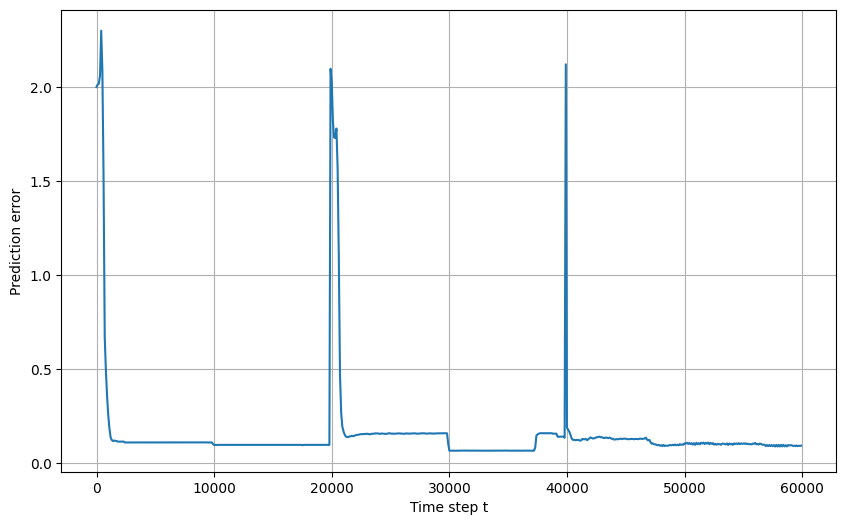

In [16]:
plot_error_by_period(df=case4_df)

## Summary

In [17]:
data_list = []

# The following are the case labels you want to pass
# labels = ['Case 1', 'Case 2', 'Case 3', 'Case 4']
labels = ['Case 1', 'Case 4']

# The following are the case labels you want to pass
data_list.append(case1_df)    # Add error values for Case 1
# data_list.append(case2_df)    # Add error values for Case 2
# data_list.append(case3_df)    # Add error values for Case 3
data_list.append(case4_df)    # Add error values for Case 4

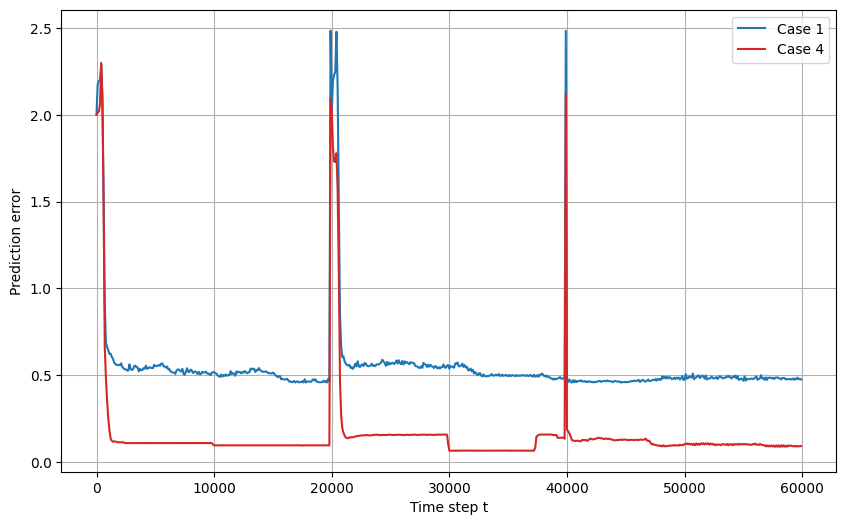

In [18]:
# plot_error_by_period_multiple(df_list=data_list)
plot_error_by_period_multiple_with_labels(df_list=data_list, labels=labels)